# Developing a Linear Regression model from scratch with just `numpy`

If there are `N` features and `M` observations, then:
We can get a feature (row) vector $\bm{x}_k^{\top},$  $k = 0, 1,\cdots, N$ of size $((N+1) \times 1)$ which corresponds to an array of shape `(N+1,)` corresponding to each unique observation (row) in the data set. There is one more added feature whose value is 1 for all rows/observations, apart from the `N` features, which we add so as to get a bias term that will be the weight corresponding to that feature, this simplifies the calculation a bit.

Then from this, the entire data set provided can be considered a matrix $\bm{X}$ (corresponding to an array of shape `(M,N+1)` such that,
$$\bm{X}_{[k,:]} \equiv \bm{x}_k^{\top}$$
$$k = 0, 1,\cdots, M-1$$
Thus, the linear regression problem is formulated as:
$$\text{Estimator: }\bm{\hat{y} = X h}$$
$\bm{h}$ is the weight vector of shape `(N+1,)`
$$\text{Loss function: }\bm{||y - \hat{y}||^2 = ||y - Xh||^2 }$$
minimizing Loss function with respect to $\bm{h}$, we get the value of $\bm{h}$ as:
$$\bm{h = (X^\top X)^{-1}X^\top y}$$
where $\bm{(X^\top X)^{-1}X^\top}$ is the pseudo-inverse of $\bm{X}$.

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [6]:
# Getting the dataset, data is X, target is y
data = datasets.load_iris().data #shape = (442, 10)
target = datasets.load_iris().target #shape = (442,)


In [7]:
# Add a new feature column containing all 1
data = np.append(data, np.ones((data.shape[0],1)), axis=1) 

In [8]:
# Calculate the regression coefficients vector using the
# np.linalg.lstsq(), which is the numpy implementation
# to solve the least square problem ||target - (data @ h)||**2
# and returns h
h = np.linalg.lstsq(data,target, rcond=None)[0]

In [9]:
# Calculating mean squared error from scratch with my own Linear Regression solver
print("Self Calculated MSE of my model:",np.linalg.norm(target - (data @ h))**2/target.shape[0])
# Verifying with scikit-learn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
print("Scikit-learn calculated MSE of my model:",mean_squared_error(target,data @ h))
reg = LinearRegression()
reg.fit(data,target)
print("Scikit-learn self calculated MSE of its model:",mean_squared_error(target, reg.predict(data)))
# My regression implementation matches with the implementation in the scikit-learn library
print("My model's r2-score:", r2_score(target, data @ h))
print("Scikit-learn's model r2-score:",r2_score(target, reg.predict(data)))

Self Calculated MSE of my model: 0.04640405209669578
Scikit-learn calculated MSE of my model: 0.046404052096695764
Scikit-learn self calculated MSE of its model: 0.04640405209669577
My model's r2-score: 0.9303939218549564
Scikit-learn's model r2-score: 0.9303939218549564


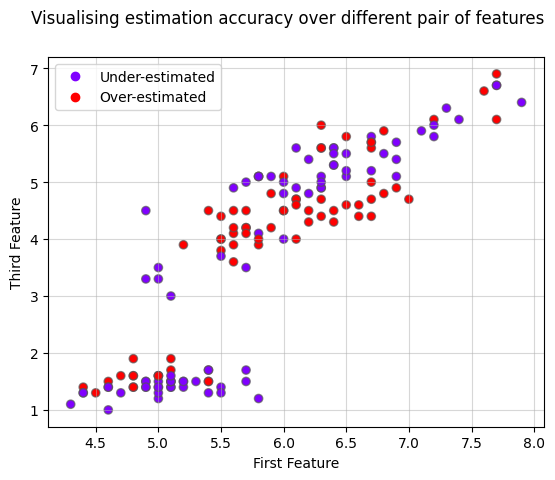

In [17]:
color_indicator = ((target - data @ h)<0)
plt.figure(2)
plt.suptitle("Visualising estimation accuracy over different pair of features")
plt.grid(1, which="both", linestyle="-", alpha=0.5)
scatter = plt.scatter(data[:,0],data[:,2], c=color_indicator, cmap="rainbow", edgecolors="#555555aa")
legend = plt.legend(*scatter.legend_elements(num=1))
legend.get_texts()[0].set_text("Under-estimated")
legend.get_texts()[1].set_text("Over-estimated")
plt.xlabel("First Feature")
plt.ylabel("Third Feature")
plt.axis("tight")
plt.savefig("LinearRegressionEstimation.svg")
plt.show()